<a href="https://colab.research.google.com/github/douyang/echonet-function-evaluation/blob/master/Calculations_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Image Samples

In [2]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

In [3]:
path = "/content/119563240_779088996173762_8588093001503046386_n.png"
# path = "/content/amyloid.jpeg"
# path = "/content/threshold.png"

#Get all of the coordinates of the edge of the segmented mask(Red Version)

In [ ]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA)
# rgb = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# # set lower and upper bounds color blue color
# lower = (0, 0, 220)
# upper = (100, 100, 255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # for i in range(112):
# #   for j in range(112):
# #     if img[i, j][2] > 200 and img[i, j][1]< 100:
# #       print(i, j, img[i, j] )


# # get contours
# result = np.zeros_like(thresh)
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Blue Version

[]
Number of points:  0


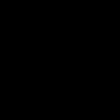

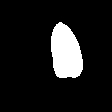

In [ ]:
# # read image
# img = cv2.imread(path)
# rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # set lower and upper bounds on blue color
# lower = (0,0,100)
# upper = (50,50,255)

# # threshold and invert so hexagon is white on black background
# thresh = cv2.inRange(rgb, lower, upper)

# # get contours
# contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# points = []
# # list contour points
# for pt in contours:
#     for i in pt:
#       for coord in i:
#         points.append(coord.tolist())
# print(points)

# print("Number of points: ", len(points))
# # show thresh and contour  
# cv2_imshow(thresh)
# cv2_imshow(img)
# # cv2_imshow(dilation)
# # cv2_imshow(closing)

# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Mask from binary mask

[[59, 22], [58, 23], [57, 24], [56, 24], [56, 25], [55, 26], [54, 27], [54, 28], [53, 29], [53, 30], [53, 31], [52, 32], [52, 33], [52, 34], [52, 35], [51, 36], [51, 37], [51, 38], [51, 39], [51, 40], [51, 41], [51, 42], [51, 43], [51, 44], [51, 45], [51, 46], [51, 47], [51, 48], [51, 49], [51, 50], [51, 51], [52, 52], [52, 53], [52, 54], [52, 55], [52, 56], [53, 57], [53, 58], [53, 59], [53, 60], [53, 61], [53, 62], [53, 63], [53, 64], [53, 65], [53, 66], [53, 67], [54, 68], [54, 69], [54, 70], [55, 71], [55, 72], [55, 73], [56, 74], [56, 75], [57, 76], [58, 76], [59, 77], [60, 77], [61, 77], [62, 77], [63, 77], [64, 77], [65, 77], [66, 77], [67, 76], [68, 76], [69, 76], [70, 76], [71, 76], [72, 77], [73, 77], [74, 77], [75, 77], [76, 76], [77, 76], [78, 75], [79, 75], [79, 74], [80, 73], [80, 72], [81, 71], [81, 70], [82, 69], [82, 68], [82, 67], [82, 66], [82, 65], [82, 64], [82, 63], [82, 62], [82, 61], [82, 60], [82, 59], [81, 58], [81, 57], [81, 56], [81, 55], [81, 54], [80, 53],

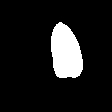

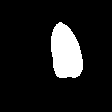

In [ ]:
# read image
img = cv2.imread(path)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# set lower and upper bounds on blue color
lower = (200,200,200)
upper = (255,255,255)

# threshold and invert so hexagon is white on black background
thresh = cv2.inRange(rgb, lower, upper)

# get contours
result = np.zeros_like(thresh)
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = contours[0] if len(contours) == 2 else contours[1]

points = []
# list contour points
for pt in contours:
    for i in pt:
      for coord in i:
        points.append(coord.tolist())
print(points)

print("Number of points: ", len(points))
# show thresh and contour  
cv2_imshow(img)
cv2_imshow(thresh)

# cv2_imshow(opening)
# cv2_imshow(closing)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
pointGroups = []
index = 0
subgroup = [points[0]]

for i in range(len(points) - 1):
  prevPoint = points[i]
  currentPoint = points[i+1]

  if abs(prevPoint[0]-currentPoint[0]) <= 1 and abs(prevPoint[1]-currentPoint[1]) <= 1:
    subgroup.append(currentPoint)
  else:
    pointGroups.append(subgroup[:])
    subgroup = [currentPoint]

pointGroups.append(subgroup)

mainPointGroup = []
maxPointGroupSize = 0

for group in pointGroups:
  if len(group) > maxPointGroupSize:
    maxPointGroup = group
    maxPointGroupSize = len(group)

points = maxPointGroup[:]

# Top 5 and Bottom 5 Analysis(Heuristic 2)


In [ ]:
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Minimum and Maximum Y Coord
maxY = max(points, key = lambda point: point[1])
minY = min(points, key = lambda point: point[1])

# MinY and MaxY With the limits
minYWith5 = minY[1] + 5
maxYWithout5 = maxY[1] - 15

# Creating these arrays
minYWith5Arr = []
maxYWithout5Arr = []

# Finding these points
for point in points:
  if point[1] == minYWith5:
    minYWith5Arr.append(point)
  if point[1] == maxYWithout5:
    maxYWithout5Arr.append(point)

# Average X Coordinates
averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

if slope > 0:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)
else:
  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


# Creating these arrays
averageTopXArr = []
averageBottomXArr = []

# Finding these points
condition = True
if slope > 0:
  while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX += 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr -= 1
else:
  while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
    for point in points:
      if point[0] == averageTopX:
        averageTopXArr.append(point)
      if point[0] == averageBottomX:
        averageBottomXArr.append(point)
    if len(averageTopXArr) > 0 and len(averageBottomXArr):
      condition = False
    if len(averageTopXArr) == 0:
      averageTopX -= 1
    if len(averageBottomXArr) == 0:
      averageBottomXArr += 1

# Sorting Arrs
averageTopXArr.sort(key=lambda point: point[1])
averageBottomXArr.sort(key=lambda point: point[1])
averageBottomXArr.reverse()


# Finding Min Top and Max Bottom
TopCoord = averageTopXArr[0]
BottomCoord = averageBottomXArr[0]

x1, y1 = TopCoord
x2, y2 = BottomCoord

if (x1 + y1) > (x2 + y2):
  x1, y1, x2, y2 = x2, y2, x1, y1

print(x1, y1, x2, y2)

59 22 70 76


# Calculate Weighted Average

In [ ]:
import math

# parallel_dist = distance/21

weighted_avg = []

for n in range(1, 21, 1):
  x_perpendicular = (((n*x1)+(21-n)*(x2))/21)
  y_perpendicular = (((n*y1)+(21-n)*(y2))/21)
  weighted_avg.append([x_perpendicular, y_perpendicular])

print(weighted_avg)

[[69.47619047619048, 73.42857142857143], [68.95238095238095, 70.85714285714286], [68.42857142857143, 68.28571428571429], [67.9047619047619, 65.71428571428571], [67.38095238095238, 63.142857142857146], [66.85714285714286, 60.57142857142857], [66.33333333333333, 58.0], [65.80952380952381, 55.42857142857143], [65.28571428571429, 52.857142857142854], [64.76190476190476, 50.285714285714285], [64.23809523809524, 47.714285714285715], [63.714285714285715, 45.142857142857146], [63.19047619047619, 42.57142857142857], [62.666666666666664, 40.0], [62.142857142857146, 37.42857142857143], [61.61904761904762, 34.857142857142854], [61.095238095238095, 32.285714285714285], [60.57142857142857, 29.714285714285715], [60.04761904761905, 27.142857142857142], [59.523809523809526, 24.571428571428573]]


# Find All Mask White points

In [ ]:
p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherIntercept = points[lowerIndex:higherIndex]
lowerIntercept = points[higherIndex:] + points[:lowerIndex]

if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
  lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

print(lowerIntercept)
print(higherIntercept)

[[70, 76], [71, 76], [72, 77], [73, 77], [74, 77], [75, 77], [76, 76], [77, 76], [78, 75], [79, 75], [79, 74], [80, 73], [80, 72], [81, 71], [81, 70], [82, 69], [82, 68], [82, 67], [82, 66], [82, 65], [82, 64], [82, 63], [82, 62], [82, 61], [82, 60], [82, 59], [81, 58], [81, 57], [81, 56], [81, 55], [81, 54], [80, 53], [80, 52], [80, 51], [80, 50], [79, 49], [79, 48], [79, 47], [79, 46], [78, 45], [78, 44], [78, 43], [77, 42], [77, 41], [76, 40], [76, 39], [75, 38], [75, 37], [74, 36], [74, 35], [73, 34], [72, 33], [72, 32], [71, 31], [70, 30], [70, 29], [69, 28], [68, 27], [67, 26], [66, 25], [65, 25], [64, 24], [63, 24], [62, 23], [61, 22], [60, 22]]
[[59, 22], [58, 23], [57, 24], [56, 24], [56, 25], [55, 26], [54, 27], [54, 28], [53, 29], [53, 30], [53, 31], [52, 32], [52, 33], [52, 34], [52, 35], [51, 36], [51, 37], [51, 38], [51, 39], [51, 40], [51, 41], [51, 42], [51, 43], [51, 44], [51, 45], [51, 46], [51, 47], [51, 48], [51, 49], [51, 50], [51, 51], [52, 52], [52, 53], [52, 54]

In [ ]:
def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            print("here1")
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point and abs(slope)<10.1:
            print("here2", slopeCond, betweenCond)
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            print("here3")
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            print("here4")
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif higherIndex + 1 >= len(higherIntercept):
            print("here5")
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

# False 0 1 [62, 20] [62, 19] [62.0001, 20.285714285714285] 12857.142856716035 2857.1428570479998 0.003003003003003003 61.93993993993994
# False 0 2 [63, 21] [62, 20] [62.0001, 20.285714285714285] 2857.1428570479998 0.7143571500007178 0.003003003003003003 62.93693693693694
# False 0 3 [64, 22] [63, 21] [62.0001, 20.285714285714285] 0.7143571500007178 0.8571857164286805 0.003003003003003003 63.933933933933936
# False 0 4 [65, 23] [64, 22] [62.0001, 20.285714285714285] 0.8571857164286805 0.9047920644973894 0.003003003003003003 64.93093093093093

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point and abs(slope)<10.1:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif lowerIndex + 1 >= len(lowerIntercept):
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

In [ ]:
i = 4

x1, y1 = lowerIntercept[i]
x2, y2 = higherIntercept[i]

slope = getSlope([x1, y1], [x2, y2])

p1Index = points.index([x1, y1])
p2Index = points.index([x2, y2])
print(len(lowerIntercept))
print(len(higherIntercept))

lowerIndex = min(p1Index, p2Index)
higherIndex = max(p1Index, p2Index)

higherInterceptPoints = points[lowerIndex:higherIndex]
lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
  lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)


# print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])


66
68
False 66 1 1 [56, 24] [56, 25] [56.857142857142854, 27.476190476190474] 2.888888888888889 2.8888888888888973 4.055555555555568 -0.34615384615384615 64.3076923076923
False 66 2 2 [57, 24] [56, 24] [56.857142857142854, 27.476190476190474] 2.888888888888889 4.055555555555568 -24.333333333332803 -0.34615384615384615 65.3076923076923
False 66 3 3 [58, 23] [57, 24] [56.857142857142854, 27.476190476190474] 2.888888888888889 -24.333333333332803 -3.916666666666655 -0.34615384615384615 65.96153846153847
False 66 4 4 [59, 22] [58, 23] [56.857142857142854, 27.476190476190474] 2.888888888888889 -3.916666666666655 -2.555555555555551 -0.34615384615384615 66.61538461538461
False 66 5 5 [60, 22] [59, 22] [56.857142857142854, 27.476190476190474] 2.888888888888889 -2.555555555555551 -1.7424242424242402 -0.34615384615384615 67.61538461538461
False 66 6 6 [61, 22] [60, 22] [56.857142857142854, 27.476190476190474] 2.888888888888889 -1.7424242424242402 -1.3218390804597688 -0.34615384615384615 68.615384

59 22
70 76
[[69.47619047619048, 73.42857142857143], [68.95238095238095, 70.85714285714286], [68.42857142857143, 68.28571428571429], [67.9047619047619, 65.71428571428571], [67.38095238095238, 63.142857142857146], [66.85714285714286, 60.57142857142857], [66.33333333333333, 58.0], [65.80952380952381, 55.42857142857143], [65.28571428571429, 52.857142857142854], [64.76190476190476, 50.285714285714285], [64.23809523809524, 47.714285714285715], [63.714285714285715, 45.142857142857146], [63.19047619047619, 42.57142857142857], [62.666666666666664, 40.0], [62.142857142857146, 37.42857142857143], [61.61904761904762, 34.857142857142854], [61.095238095238095, 32.285714285714285], [60.57142857142857, 29.714285714285715], [60.04761904761905, 27.142857142857142], [59.523809523809526, 24.571428571428573]]


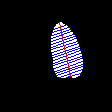

[[56, 25], [55, 26], [54, 27], [54, 28], [53, 29], [53, 30], [53, 31], [52, 32], [52, 33], [52, 34], [52, 35], [51, 36], [51, 37], [51, 38], [51, 39], [51, 40], [51, 41], [51, 42], [51, 43], [51, 44], [51, 45], [51, 46], [51, 47], [51, 48], [51, 49], [51, 50], [51, 51], [52, 52], [52, 53], [52, 54], [52, 55], [52, 56], [53, 57], [53, 58], [53, 59], [53, 60], [53, 61], [53, 62], [53, 63], [53, 64], [53, 65], [53, 66], [53, 67], [54, 68], [54, 69], [54, 70], [55, 71], [55, 72], [55, 73], [56, 74], [56, 75], [57, 76], [58, 76], [59, 77], [60, 77], [61, 77], [62, 77], [63, 77], [64, 77], [65, 77], [66, 77], [67, 76], [68, 76], [69, 76], [70, 76], [71, 76], [72, 77], [73, 77]]
[[74, 77], [75, 77], [76, 76], [77, 76], [78, 75], [79, 75], [79, 74], [80, 73], [80, 72], [81, 71], [81, 70], [82, 69], [82, 68], [82, 67], [82, 66], [82, 65], [82, 64], [82, 63], [82, 62], [82, 61], [82, 60], [82, 59], [81, 58], [81, 57], [81, 56], [81, 55], [81, 54], [80, 53], [80, 52], [80, 51], [80, 50], [79, 49]

In [ ]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for j in range(len(lowerInterceptAveragePoints)): 
    cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,0,0), 1)

for point in lowerInterceptAveragePoints:
  if point == [42, 56]:
    cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)

cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)

print(lowerInterceptPoints)
print(higherInterceptPoints)
print(weighted_avg)
print(lowerInterceptAveragePoints)
print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

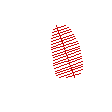

In [ ]:
blank_image = np.zeros((112, 112, 3), dtype="uint8")
blank_image.fill(255)
for j in range(len(lowerInterceptAveragePoints)): 
    cv2.line(blank_image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (10,10,200), 1)
cv2.line(blank_image, (x1, y1), (x2, y2), (10,10,200), 1)

cv2_imshow(blank_image)

# Split points into 2

In [ ]:
# def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
#   # Calculate perpendicular slope
#   try:
#     perp_slope = -1/slope
#   except:
#     perp_slope = 10000

#   # Indexing
#   lowerIndex = 0
#   higherIndex = 0

#   # Make sure its from top to bottom direction
#   if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
#     weighted_avg = weighted_avg[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
#       higherIntercept = higherIntercept[::-1]

#   # Make sure its from top to bottom direction
#   if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
#       lowerIntercept = lowerIntercept[::-1]

#   higherInterceptAveragePoints = []
#   lowerInterceptAveragePoints = []

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = higherIntercept[higherIndex]
#         if higherIndex == 0:
#           prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = higherIntercept[higherIndex-1]
        
#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) >= 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           higherInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(higherIntercept)/2:
#           higherIndex -= count
#           if higherIndex == 0:
#             higherInterceptAveragePoints.append(start_point)
#           else:
#             higherInterceptAveragePoints.append(higherIntercept[higherIndex])
#           condition = False
        
#         count += 1
#         higherIndex += 1
#     except:
#       higherInterceptAveragePoints.append(higherIntercept[higherIndex - 1])

#   for averagePoint in weighted_avg:
#     try:
#       condition = True
#       count = 0
#       while condition:
#         point = lowerIntercept[lowerIndex]
#         if lowerIndex == 0:
#           prev_point = [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
#           start_point = prev_point[:]
#         else:
#           prev_point = lowerIntercept[lowerIndex-1]

#         new_slope = getSlope(point, averagePoint)
#         prev_slope =  getSlope(prev_point, averagePoint)
#         betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
#         slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

#         if slopeCond and not betweenCond:
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif abs(perp_slope) > 10 and ((new_slope > 0 and prev_slope < 0) or (new_slope < 0 and prev_slope > 0)):
#           lowerInterceptAveragePoints.append(point)
#           condition = False
#         elif count > len(lowerIntercept)/2:
#           lowerIndex -= count
#           if lowerIndex == 0:
#             lowerInterceptAveragePoints.append(start_point)
#           else:
#             lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
#           condition = False
        
#         count += 1
#         lowerIndex += 1
#     except:
#       lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex - 1])
  
#   if i == 30:
#       print(higherIntercept)
#       print(lowerIntercept)
#       print(weighted_avg)
#       print(lowerInterceptAveragePoints)
#       print(higherInterceptAveragePoints)
#   return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

#  \


In [ ]:
# i = 30

# x1, y1 = lowerIntercept[i]
# x2, y2 = higherIntercept[i]

# print(x1, y1, x2, y2)

# slope = getSlope([x1, y1], [x2, y2])

# p1Index = points.index([x1, y1])
# p2Index = points.index([x2, y2])

# lowerIndex = min(p1Index, p2Index)
# higherIndex = max(p1Index, p2Index)

# higherInterceptPoints = points[lowerIndex:higherIndex]
# lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

# if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
#   lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

# weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, 20)
# lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)

74 77
56 25
[[56.857142857142854, 27.476190476190474], [57.714285714285715, 29.952380952380953], [58.57142857142857, 32.42857142857143], [59.42857142857143, 34.904761904761905], [60.285714285714285, 37.38095238095238], [61.142857142857146, 39.857142857142854], [62.0001, 42.333333333333336], [62.857142857142854, 44.80952380952381], [63.714285714285715, 47.285714285714285], [64.57142857142857, 49.76190476190476], [65.42857142857143, 52.23809523809524], [66.28571428571429, 54.714285714285715], [67.14285714285714, 57.19047619047619], [68.0001, 59.666666666666664], [68.85714285714286, 62.142857142857146], [69.71428571428571, 64.61904761904762], [70.57142857142857, 67.0952380952381], [71.42857142857143, 69.57142857142857], [72.28571428571429, 72.04761904761905], [73.14285714285714, 74.52380952380952]]


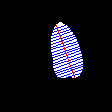

In [ ]:
image = cv2.imread(path) 

height = image.shape[0]
width = image.shape[1]


# for point in weighted_avg:
#   cv2.circle(image,(int(point[0]), int(point[1])), 1, (0,255,0), -1)
  # if point[0] <50:
  #   print(point)

print(x1, y1)
print(x2, y2)
print(weighted_avg)
for i in range(len(lowerInterceptAveragePoints)): 
  # cv2.circle(image,tuple(lowerInterceptAveragePoints[i]), 1, (0,255,0), -1)
  cv2.line(image, tuple(lowerInterceptAveragePoints[i]), tuple(higherInterceptAveragePoints[i]), (255,0,0), 1)
cv2.line(image, (x1, y1), (x2, y2), (0,0,255), 1)

cv2_imshow(image)


# print(lowerInterceptAveragePoints)
# print(higherInterceptAveragePoints)
# print([x1, y1])
# print([x2, y2])

cv2.waitKey(0)
cv2.destroyAllWindows()

# Method of Disks

In [ ]:
distance = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

volume = 0

for i in range(len(lowerInterceptAveragePoints)):
  diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  radius = diameter/2
  diskVolume = math.pi * radius**2 * parallelSeperationDistance
  volume += diskVolume

print(volume)

26033.888923937473


# Prolate Ellipsoid Model (Single Ellipsoid Method)

In [ ]:
long_axis_length = getDistance([x1, y1], [x2, y2])
parallelSeperationDistance = distance/21

# Manual Area Calc
area = 0

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  diskArea = length * parallelSeperationDistance
  area += diskArea

volume = 0.85 * area * long_axis_length

print(volume)

60398.8520858397


# Prolate Ellipsoid Model (Biplane Area Length)

In [ ]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Storing all perp lens
lengthArr = []

for i in range(len(lowerInterceptAveragePoints)):
  length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
  lengthArr.append(length)

# 3 diff heuristics
averageLength = sum(lengthArr)/len(lengthArr)
maxLength = max(lengthArr)
midLength = lengthArr[len(lengthArr)//2]

# Volume Calc
volume = math.pi/6 * midLength**2 * long_axis_length

print(volume)

21810.842277935913


# Bullet Method


In [ ]:
# Long axis Length
long_axis_length = getDistance([x1, y1], [x2, y2])

# Mid Values
midIndex = len(lengthArr)//2
midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

area = math.pi * (midLength/2)**2 

# Volume Calc
volume = 5/6 * area * long_axis_length

print(volume)

27263.552847419895


# Will become local file


In [14]:
import cv2
import numpy as np
import math
import os

# Gets all the contours for certain image
def obtainContourPoints(path):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (0,0,100)
  upper = (50,50,255)
  
  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

# Gets all the eroded contours for certain image
def obtainErodedContourPoints(path, iterations):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (0,0,100)
  upper = (50,50,255)
  
  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  kernel = np.ones((2,2),np.uint8)
  erosion = cv2.erode(thresh,kernel,iterations = iterations)

  contours = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points

# Gets all the dilated contours for certain image
def obtainDilatedContourPoints(path, iterations):
  # read image
  img = cv2.imread(path)
  rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # set lower and upper bounds on blue color
  lower = (0,0,100)
  upper = (50,50,255)
  
  # threshold and invert so hexagon is white on black background
  thresh = cv2.inRange(rgb, lower, upper)

  # get contours
  kernel = np.ones((2,2),np.uint8)
  dilation = cv2.dilate(thresh,kernel,iterations = iterations)

  contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  contours = contours[0] if len(contours) == 2 else contours[1]

  # Gets all contour points
  points = []
  for pt in contours:
      for i in pt:
        for coord in i:
          points.append(coord.tolist())
  
  return points
    
def getIdealPointGroup(points):
  pointGroups = []
  index = 0
  subgroup = [points[0]]


  for i in range(len(points) - 1):
    prevPoint = points[i]
    currentPoint = points[i+1]

    if (abs(int(prevPoint[0])-int(currentPoint[0])) <= 1) and (abs(int(prevPoint[1])-int(currentPoint[1])) <= 1):
      subgroup.append(currentPoint)
    else:
      pointGroups.append(subgroup[:])
      subgroup = [currentPoint]

  pointGroups.append(subgroup)

  mainPointGroup = []
  maxPointGroupSize = 0

  for group in pointGroups:
    if len(group) > maxPointGroupSize:
      maxPointGroup = group
      maxPointGroupSize = len(group)

  return maxPointGroup

# Finds points for main contour line
def getTopAndBottomCoords(points):
  # Minimum and Maximum Y Coord
  maxY = max(points, key = lambda point: point[1])
  minY = min(points, key = lambda point: point[1])

  # MinY and MaxY With the limits
  minYWith5 = minY[1] + 5
  maxYWithout5 = maxY[1] - 15

  # Creating these arrays
  minYWith5Arr = []
  maxYWithout5Arr = []

  # Finding these points
  for point in points:
    if point[1] == minYWith5:
      minYWith5Arr.append(point)
    if point[1] == maxYWithout5:
      maxYWithout5Arr.append(point)

  # Average X Coordinates
  averageTopX = round((minYWith5Arr[0][0] + minYWith5Arr[-1][0])/2)
  averageBottomX = round((maxYWithout5Arr[0][0] + maxYWithout5Arr[-1][0])/2)
  slope = getSlope([averageTopX, minYWith5], [averageBottomX, maxYWithout5])

  averageTopX -= round((minYWith5Arr[-1][0] - minYWith5Arr[0][0])/1.5/slope)
  averageBottomX += round((maxYWithout5Arr[-1][0] - maxYWithout5Arr[0][0])/3/slope)


  # Creating these arrays
  averageTopXArr = []
  averageBottomXArr = []

  # Finding these points
  condition = True
  if slope > 0:
    while condition and averageTopX <= minYWith5Arr[-1][0] and averageBottomX >= maxYWithout5Arr[0][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX += 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr -= 1
  else:
    while condition and averageTopX >= minYWith5Arr[0][0] and averageBottomX <= maxYWithout5Arr[-1][0]:
      for point in points:
        if point[0] == averageTopX:
          averageTopXArr.append(point)
        if point[0] == averageBottomX:
          averageBottomXArr.append(point)
      if len(averageTopXArr) > 0 and len(averageBottomXArr):
        condition = False
      if len(averageTopXArr) == 0:
        averageTopX -= 1
      if len(averageBottomXArr) == 0:
        averageBottomXArr += 1

  # Sorting Arrs
  averageTopXArr.sort(key=lambda point: point[1])
  averageBottomXArr.sort(key=lambda point: point[1])
  averageBottomXArr.reverse()


  # Finding Min Top and Max Botpp,
  TopCoord = averageTopXArr[0]
  BottomCoord = averageBottomXArr[0]

  x1, y1 = TopCoord
  x2, y2 = BottomCoord

  return (x1, y1, x2, y2)


# Create the 20 equally spaced points
def getWeightedAveragePoints(x1, y1, x2, y2, number):
  weighted_avg = []

  for n in range(1, number+1, 1):
    x_perpendicular = (((n*x1)+(number+1-n)*(x2))/(number+1))
    y_perpendicular = (((n*y1)+(number+1-n)*(y2))/(number+1))
    weighted_avg.append([x_perpendicular, y_perpendicular])

  for pair in weighted_avg:
    x, y = pair
    if x == int(x):
      pair[0] += 0.0001
    if y == int(y):
      pair[1] += 0.0001

  return weighted_avg

# Intercept slope
def calcExpectedIntercept(x, y, slope):
  return slope*x - y

def splitPoints(x1, y1, x2, y2, slope, points):
  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherIntercept = points[lowerIndex:higherIndex]
  lowerIntercept = points[higherIndex:] + points[:lowerIndex]

  return (lowerIntercept, higherIntercept)

# Distance Between 2 Pointss
def getDistance(point1, point2):
  return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# Slope between points 
def getSlope(point1, point2):
  if ((point1[0] == point2[0])):
    return -333
  return (point1[1] - point2[1])/(point1[0] - point2[0])

# Change to Method of Disks
def volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis length and perp initialzation
  distance = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = distance/(number + 1)

  # Simpson Volume Methods
  volume = 0

  for i in range(len(lowerInterceptAveragePoints)):
    diameter = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    radius = diameter/2
    diskVolume = math.pi * radius**2 * parallelSeperationDistance
    volume += diskVolume

  return volume

# Prolate Ellipsoid Method
def volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  volume = 0.85 * area * long_axis_length

  return volume

# Bullet Method Calculation
def volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  # Long axis Length
  long_axis_length = getDistance([x1, y1], [x2, y2])

  # Storing all perp lens
  lengthArr = []

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    lengthArr.append(length)

  midIndex = len(lengthArr)//2
  midLength = getDistance(lowerInterceptAveragePoints[midIndex], higherInterceptAveragePoints[midIndex])

  area = math.pi * (midLength/2)**2 

  # Volume Calc
  volume = 5/6 * area * long_axis_length

  return volume

# Area Calculation
def areaCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints):
  long_axis_length = getDistance([x1, y1], [x2, y2])
  parallelSeperationDistance = long_axis_length/21

  # Manual Area Calc
  area = 0

  for i in range(len(lowerInterceptAveragePoints)):
    length = getDistance(lowerInterceptAveragePoints[i], higherInterceptAveragePoints[i])
    diskArea = length * parallelSeperationDistance
    area += diskArea

  return area


def findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, slope, i):
  # Calculate perpendicular slope
  try:
    perp_slope = -1/slope
  except:
    perp_slope = 10000

  # Indexing
  lowerIndex = 0
  higherIndex = 0

  # Make sure its from top to bottom direction
  if (weighted_avg[-1][0] + weighted_avg[-1][1]) < (weighted_avg[0][0] + weighted_avg[0][1]):
    weighted_avg = weighted_avg[::-1]

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], higherIntercept[0]) > getDistance(weighted_avg[0], higherIntercept[-1]):
      higherIntercept = higherIntercept[::-1]
  
  # print(higherIntercept)

  # Make sure its from top to bottom direction
  if getDistance(weighted_avg[0], lowerIntercept[0]) > getDistance(weighted_avg[0], lowerIntercept[-1]):
      lowerIntercept = lowerIntercept[::-1]

  higherInterceptAveragePoints = []
  lowerInterceptAveragePoints = []

  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        higherIndex = max(higherIndex, len(higherInterceptAveragePoints))
        point = higherIntercept[higherIndex]
        if higherIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = higherIntercept[higherIndex-1]
        
        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)

        count += 1
        higherIndex += 1

        if perp_slope == 10000:
          if (point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0]):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
        elif not (len(higherInterceptAveragePoints)>0 and higherInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point and abs(slope)<10.1:
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            higherInterceptAveragePoints.append(point)
            condition = False
            higherIndex -= 1
          elif higherIndex + 1 >= len(higherIntercept):
            higherIndex -= count
            if higherIndex == 0:
              higherInterceptAveragePoints.append(start_point)
            else:
              higherInterceptAveragePoints.append(higherIntercept[higherIndex])
            condition = False
            higherIndex -= 1
        # print(slopeCond and not betweenCond, len(higherIntercept), higherIndex, count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      higherInterceptAveragePoints.append(higherIntercept[-1])
  
  for averagePoint in weighted_avg:
    try:
      condition = True
      count = 0
      while condition:
        lowerIndex = max(lowerIndex, len(lowerInterceptAveragePoints))
        point = lowerIntercept[lowerIndex]

        if lowerIndex == 0:
          prev_point =  [x1, y1] if getDistance(point, [x1, y1]) < getDistance(point, [x2, y2]) else [x2, y2]
          start_point = prev_point[:]
        else:
          prev_point = lowerIntercept[lowerIndex-1]


        new_slope = getSlope(point, averagePoint)
        prev_slope =  getSlope(prev_point, averagePoint)
        betweenCond = ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])) and abs(new_slope) > abs(slope) and abs(prev_slope) > abs(slope)
        slopeCond = (new_slope >= perp_slope and prev_slope<=perp_slope) or  (new_slope <= perp_slope and prev_slope>=perp_slope)
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, prev_slope, new_slope, perp_slope)

        count += 1
        lowerIndex += 1

        if perp_slope == 10000:
          if ((point[0] < averagePoint[0] and prev_point[0] > averagePoint[0]) or (point[0] > averagePoint[0] and prev_point[0] < averagePoint[0])):            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
        elif not (len(lowerInterceptAveragePoints)>0 and lowerInterceptAveragePoints[0] == point and point == start_point):
          if (slopeCond and not betweenCond) and prev_point != start_point and abs(slope)<10.1:            
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(perp_slope) > 7.1) and ((new_slope > 1.1*abs(slope) and prev_slope < -1.1*abs(slope)) or (new_slope < -1.1*abs(slope) and prev_slope > 1.1*abs(slope))):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif (abs(slope) > 7.1) and ((point[1] < averagePoint[1] and prev_point[1] > averagePoint[1]) or (point[1] > averagePoint[1] and prev_point[1] < averagePoint[1])):
            lowerInterceptAveragePoints.append(point)
            condition = False
            lowerIndex -= 1
          elif lowerIndex + 1 >= len(lowerIntercept):
            lowerIndex -= count
            if lowerIndex == 0:
              lowerInterceptAveragePoints.append(start_point)
            else:
              lowerInterceptAveragePoints.append(lowerIntercept[lowerIndex])
            condition = False
            lowerIndex -= 1
        # print(slopeCond and not betweenCond, len(lowerInterceptAveragePoints), count, point, prev_point, averagePoint, slope, prev_slope, new_slope, perp_slope, point[0]-perp_slope*point[1])
    except:
      lowerInterceptAveragePoints.append(lowerIntercept[-1])

  matchedAveragePoints = [lowerInterceptAveragePoints[i] + higherInterceptAveragePoints[i] for i in range(len(lowerInterceptAveragePoints))]
  matchedAveragePoints.sort(key=lambda coord: (coord[0] + coord[2]) - perp_slope*(coord[1] + coord[3]))
  lowerInterceptAveragePoints = [[matchedAveragePoints[i][0], matchedAveragePoints[i][1]] for i in range(len(matchedAveragePoints))]
  higherInterceptAveragePoints = [[matchedAveragePoints[i][2], matchedAveragePoints[i][3]] for i in range(len(matchedAveragePoints))]

  return (lowerInterceptAveragePoints, higherInterceptAveragePoints)

# Angle Shifts
def calculateVolumeAngleShift(path, number, sweeps = 15, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1

  mainLineSlope = getSlope([x1, y1], [x2, y2])

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}
  degrees = {}


  # Volumes for all 0 to 5 cases
  for i in range(-sweeps, sweeps+1, 1):
    x1, y1 = lowerIntercept[i]
    x2, y2 = higherIntercept[i]

    slope = getSlope([x1, y1], [x2, y2])

    try:
      degree = math.atan((mainLineSlope-slope)/(1+mainLineSlope*slope)) * 180/math.pi
    except:
      degree = 90

    if (degree > 0 and i < 0): 
      degree = -180+degree

    elif (degree < 0 and i > 0):
      degree = 180+degree

    degrees[i] = degree
    
    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[i] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[i] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[i] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[i] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(i)
      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[i] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[i] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[i] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s, degrees)

# Main Axis Top Shifts
def calculateVolumeMainAxisTopShift(path, number, pointShifts = 15, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1
  
  mainLineSlope = getSlope([x1, y1], [x2, y2])

  xChange = 1/math.sqrt(1+mainLineSlope**2) * abs(mainLineSlope)/mainLineSlope
  yChange = abs(mainLineSlope/math.sqrt(1+mainLineSlope**2))
  distance = getDistance([x1, y1], [x2, y2])

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}

  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherInterceptPoints = points[lowerIndex:higherIndex]
  lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

  if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
    lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

  # Volumes for all 0 to 5 cases
  for i in range(0, pointShifts):
    # x1, y1 = lowerIntercept[i]
    # x2, y2 = higherIntercept[i]

    x1 += 2*xChange
    # x2 -= xChange
    y1 += 2*yChange
    # y2 -= yChange

    slope = getSlope([x1, y1], [x2, y2])

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[(i)/distance] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[(i)/distance] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[(i)/distance] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[(i)/distance] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    # if i < 100:
    #   print(i)
    #   image = cv2.imread(path) 


    #   # for point in points:
    #   #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
    #   #   if point[0] <50:
    #   #     print(point)


    #   # for point in weighted_avg: 
    #   #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
    #   for j in range(len(lowerInterceptAveragePoints)): 
    #     cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


    #   cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,0), 1)

    #   cv2_imshow(image)
    #   cv2.waitKey(0)
    #   cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[(i)/distance] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[(i)/distance] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[(i)/distance] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s)


# Main Axis Bottom Shifts
def calculateVolumeMainAxisBottomShift(path, number, pointShifts = 15, method = "Method of Disks"):
  points = getIdealPointGroup(obtainContourPoints(path))

  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1
  
  mainLineSlope = getSlope([x1, y1], [x2, y2])

  xChange = 1/math.sqrt(1+mainLineSlope**2) * abs(mainLineSlope)/mainLineSlope
  yChange = abs(mainLineSlope/math.sqrt(1+mainLineSlope**2))
  distance = getDistance([x1, y1], [x2, y2])

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)

  if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
    lowerIntercept, higherIntercept = higherIntercept, lowerIntercept

  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}

  p1Index = points.index([x1, y1])
  p2Index = points.index([x2, y2])

  lowerIndex = min(p1Index, p2Index)
  higherIndex = max(p1Index, p2Index)

  higherInterceptPoints = points[lowerIndex:higherIndex]
  lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

  if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
    lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

  # Volumes for all 0 to 5 cases
  for i in range(0, pointShifts):
    # x1, y1 = lowerIntercept[i]
    # x2, y2 = higherIntercept[i]

    # x1 += xChange
    x2 -= 2*xChange
    # y1 += yChange
    y2 -= 2*yChange

    slope = getSlope([x1, y1], [x2, y2])

    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)
    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, slope, i)
    
    x1s[(i)/distance] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[(i)/distance] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[(i)/distance] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[(i)/distance] = [y2] + [point[1] for point in higherInterceptAveragePoints]

    if i < 100:
      print(i)
      image = cv2.imread(path) 


      # for point in points:
      #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
      #   if point[0] <50:
      #     print(point)


      # for point in weighted_avg: 
      #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
      for j in range(len(lowerInterceptAveragePoints)): 
        cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


      cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,0), 1)

      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[(i)/distance] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[(i)/distance] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[(i)/distance] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  return (volumes, x1s, y1s, x2s, y2s)

# Erosion and Dilation
def calculateVolumeErosionAndDilation(path, number, iterations = 5, method = "Method of Disks"):
  volumes = {}
  x1s = {}
  y1s = {}
  x2s = {}
  y2s = {}

  points = getIdealPointGroup(obtainContourPoints(path))
  x1, y1, x2, y2 = getTopAndBottomCoords(points)
  if (x1 + y1) > (x2 + y2):
    x1, y1, x2, y2 = x2, y2, x1, y1
  
  mainLineSlope = getSlope([x1, y1], [x2, y2])
  weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)

  lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)
  lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerIntercept, higherIntercept, x1, y1, x2, y2, mainLineSlope, 0)
  baseArea = areaCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)

  for i in range(-iterations, iterations, 1):
    if i > 0:
      points = getIdealPointGroup(obtainErodedContourPoints(path, iterations=abs(i)))
    elif i < 0:
      points = getIdealPointGroup(obtainDilatedContourPoints(path, iterations=abs(i)))
    else:
      points = getIdealPointGroup(obtainContourPoints(path))

    if (higherIntercept[0][0] + higherIntercept[0][1]) > (lowerIntercept[0][0] + lowerIntercept[0][1]):
      lowerIntercept, higherIntercept = higherIntercept, lowerIntercept
    
    x1, y1, x2, y2 = getTopAndBottomCoords(points)
    if (x1 + y1) > (x2 + y2):
      x1, y1, x2, y2 = x2, y2, x1, y1
    
    mainLineSlope = getSlope([x1, y1], [x2, y2])
    weighted_avg = getWeightedAveragePoints(x1, y1, x2, y2, number)

    lowerIntercept, higherIntercept = splitPoints(x1, y1, x2, y2, mainLineSlope, points)
  
    p1Index = points.index([x1, y1])
    p2Index = points.index([x2, y2])

    lowerIndex = min(p1Index, p2Index)
    higherIndex = max(p1Index, p2Index)

    higherInterceptPoints = points[lowerIndex:higherIndex]
    lowerInterceptPoints = points[higherIndex:] + points[:lowerIndex]

    if (higherInterceptPoints[0][0] + higherInterceptPoints[0][1]) < (lowerInterceptPoints[0][0] + lowerInterceptPoints[0][1]):
      lowerInterceptPoints, higherInterceptPoints = higherInterceptPoints, lowerInterceptPoints

    lowerInterceptAveragePoints, higherInterceptAveragePoints = findCorrespondingMaskPoints(weighted_avg, lowerInterceptPoints, higherInterceptPoints, x1, y1, x2, y2, mainLineSlope, i)
    newArea = areaCalc(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
    areaChange = round((newArea - baseArea)/baseArea * 100)

    x1s[areaChange] = [x1] + [point[0] for point in lowerInterceptAveragePoints]
    y1s[areaChange] = [y1] + [point[1] for point in lowerInterceptAveragePoints]

    x2s[areaChange] = [x2] + [point[0] for point in higherInterceptAveragePoints]
    y2s[areaChange] = [y2] + [point[1] for point in higherInterceptAveragePoints]
    
    # if i < 100:
    #   print(i)
    #   image = cv2.imread(path) 


    #   # for point in points:
    #   #   cv2.circle(image,tuple(point), 1, (255,255,255), -1)
    #   #   if point[0] <50:
    #   #     print(point)


    #   # for point in weighted_avg: 
    #   #   cv2.circle(image,tuple((int(point[0]), int(point[1]))), 1, (0,0,0), -1)
      
    #   for j in range(len(lowerInterceptAveragePoints)): 
    #     cv2.line(image, tuple(lowerInterceptAveragePoints[j]), tuple(higherInterceptAveragePoints[j]), (255,255,0), 1)


    #   cv2.line(image, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,0), 1)

    #   cv2_imshow(image)
    #   cv2.waitKey(0)
    #   cv2.destroyAllWindows()


    if  method == "Method of Disks":
      volumes[areaChange] = volumeMethodOfDisks(x1, y1, x2, y2, number, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Prolate Ellipsoid":
      volumes[areaChange] = volumeProlateEllipsoidMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    elif method == "Bullet Method":
      volumes[areaChange] = volumeBulletMethod(x1, y1, x2, y2, lowerInterceptAveragePoints, higherInterceptAveragePoints)
    
  print(mainLineSlope)
  return (volumes, x1s, y1s, x2s, y2s)

In [15]:
# print(calculateVolumeMainAxisBottomShift(path, 20, 30, method = "Method of Disks"))
# print(calculateVolumeMainAxisShift(path, 20, 20, method = "Method of Disks"))
print(calculateVolumeErosionAndDilation(path, 20, 5, method = "Method of Disks"))



10.2
({35: 50736.20093845418, 28: 46621.647783990076, 19: 42199.292946605325, 13: 38446.0529596654, 7: 35150.201596530525, 0: 31646.025133152947, -7: 28009.10918512018, -13: 25177.47467293617, -28: 19918.938668242878, -33: 17885.153738075784}, {35: [65, 58, 58, 58, 58, 58, 56, 56, 56, 54, 55, 50, 50, 54, 52, 52, 52, 54, 54, 56, 64], 28: [65, 58, 58, 58, 58, 58, 57, 56, 56, 54, 50, 55, 50, 52, 52, 54, 52, 54, 54, 56, 64], 19: [64, 58, 58, 58, 58, 58, 58, 56, 56, 54, 50, 54, 50, 51, 56, 52, 52, 54, 54, 56, 58], 13: [63, 58, 58, 58, 58, 58, 58, 56, 56, 56, 54, 55, 50, 50, 52, 52, 52, 54, 54, 56, 58], 7: [63, 58, 58, 58, 58, 58, 58, 56, 56, 56, 54, 50, 55, 50, 54, 52, 52, 52, 54, 56, 58], 0: [64, 58, 58, 58, 58, 58, 58, 56, 56, 50, 54, 56, 52, 55, 52, 52, 54, 52, 54, 56, 58], -7: [63, 59, 59, 59, 59, 59, 59, 57, 57, 57, 55, 56, 55, 53, 52, 53, 53, 54, 55, 59, 58], -13: [63, 60, 60, 60, 60, 60, 60, 58, 58, 58, 56, 56, 57, 54, 54, 54, 54, 56, 56, 60, 59], -28: [64, 61, 61, 61, 61, 61, 61, 59